In [261]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)
import numpy as np
import seaborn as sns

# EDA
## Load Data

In [262]:
Posts = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/300000_rows_[504_MB]/Posts.csv')

## Check NA of Posts

Text(0.5,1,'Posts NA')

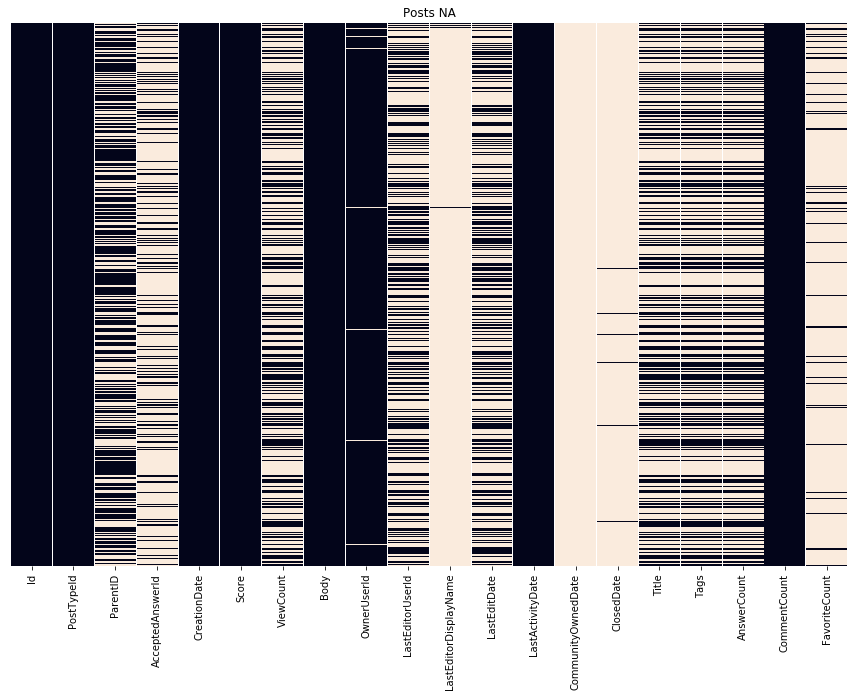

In [263]:
sns.heatmap(Posts.isnull(), yticklabels=False, cbar=False)
plt.title('Posts NA')

In [264]:
Posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
Id                       300000 non-null int64
PostTypeId               300000 non-null int64
ParentID                 182662 non-null float64
AcceptedAnswerId         62494 non-null float64
CreationDate             300000 non-null object
Score                    300000 non-null int64
ViewCount                116694 non-null float64
Body                     299881 non-null object
OwnerUserId              297071 non-null float64
LastEditorUserId         117951 non-null float64
LastEditorDisplayName    1881 non-null object
LastEditDate             118854 non-null object
LastActivityDate         300000 non-null object
CommunityOwnedDate       882 non-null object
ClosedDate               5188 non-null object
Title                    116699 non-null object
Tags                     116694 non-null object
AnswerCount              116694 non-null float64
CommentCount             30000

# Timely Collaboration and Values
## Answers Posts

In [265]:
import datetime
import calendar

#date to timestamp
def date_ts(s):
    """ 
    param s: str - date
    returns: int - timestamp
    """
    date = datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S")
    st = calendar.timegm(date.utctimetuple())
    return(st)

In [266]:
df_answers = Posts[Posts.PostTypeId == 2]

In [267]:
df_answers = df_answers.reset_index(drop=True)

In [268]:
df_answers.CreationDate = df_answers.CreationDate.str[:-4]

In [269]:
unix_ans = [date_ts(i) for i in df_answers.CreationDate]

In [270]:
df_answers_time = pd.DataFrame({'ParentID':df_answers.ParentID, 'Cr_time':unix_ans})

In [271]:
df_list = df_answers_time.groupby(df_answers_time.ParentID)

In [272]:
uni_par_id = list(df_answers_time.ParentID.unique())

In [273]:
ans_date = [list(df_list.get_group(i).Cr_time) for i in uni_par_id]

In [274]:
yes = 0
no = 0
for i in ans_date:
    if len(i) == 1:
        yes += 1
    else:
        no += 1
print(yes, no)

#there are 2917 posts with only 1 answer, 15773 posts with more than 1 answers.

180659 991


In [275]:
#set 1-answer post sd to 0
for i in ans_date:
    if len(i) == 1:
        i.append(i[0])
    else:
        i == i

In [276]:
import statistics
ans_time_sd = [statistics.stdev(i) for i in ans_date]

In [277]:
post_Id = sorted(list(df_answers.ParentID.unique()))

In [278]:
post_ans_sd = pd.DataFrame({'post_Id':post_Id, 'time_sd':ans_time_sd})

In [279]:
post_ans_sd.head()

,post_Id,time_sd
0,104.0,0.0
1,231.0,0.0
2,361.0,0.0
3,746.0,0.0
4,835.0,0.0


## Parents Posts

In [280]:
Parents_post = Posts[Posts.PostTypeId == 1]

In [281]:
Parents_post = Parents_post.reset_index(drop=True)

In [282]:
Parents_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116694 entries, 0 to 116693
Data columns (total 20 columns):
Id                       116694 non-null int64
PostTypeId               116694 non-null int64
ParentID                 0 non-null float64
AcceptedAnswerId         62494 non-null float64
CreationDate             116694 non-null object
Score                    116694 non-null int64
ViewCount                116694 non-null float64
Body                     116694 non-null object
OwnerUserId              115096 non-null float64
LastEditorUserId         62447 non-null float64
LastEditorDisplayName    1092 non-null object
LastEditDate             63073 non-null object
LastActivityDate         116694 non-null object
CommunityOwnedDate       83 non-null object
ClosedDate               5188 non-null object
Title                    116694 non-null object
Tags                     116694 non-null object
AnswerCount              116694 non-null float64
CommentCount             116694 non-nu

In [283]:
df_parents = pd.DataFrame({'post_Id':Parents_post.Id, 'Views_count':Parents_post.ViewCount,\
                           'Score':Parents_post.Score, 'Comment_count':Parents_post.CommentCount})

In [284]:
df_comb = df_parents.join(post_ans_sd.set_index('post_Id'), on='post_Id')

In [285]:
df_comb.head()

,Comment_count,Score,Views_count,post_Id,time_sd
0,0,27,3784.0,657,NaN
1,1,224,61522.0,1005,NaN
2,1,56,52627.0,3164,NaN
3,0,1,276.0,5682,NaN
4,0,6,1521.0,7015,NaN


## Plots

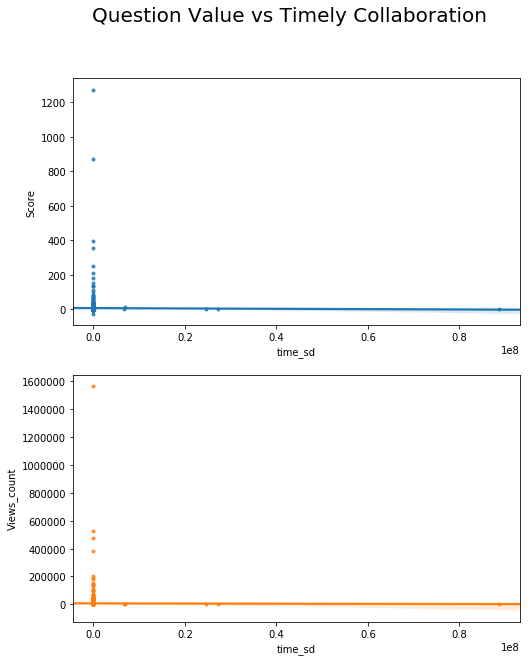

In [286]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, df_comb.Score, marker=".", ax=ax1)
sns.regplot(df_comb.time_sd, df_comb.Views_count, marker=".", ax=ax2)

## Data transformation

In [287]:
df_comb.head()

,Comment_count,Score,Views_count,post_Id,time_sd
0,0,27,3784.0,657,NaN
1,1,224,61522.0,1005,NaN
2,1,56,52627.0,3164,NaN
3,0,1,276.0,5682,NaN
4,0,6,1521.0,7015,NaN


In [288]:
df_comb.Views_count.describe()

count    1.166940e+05
mean     2.040163e+03
std      1.526655e+04
min      4.000000e+00
25%      7.400000e+01
50%      2.480000e+02
75%      9.270000e+02
max      1.790736e+06
Name: Views_count, dtype: float64

In [289]:
df_comb.Score.describe()

count    116694.000000
mean          1.899943
std          16.149055
min         -28.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        2471.000000
Name: Score, dtype: float64

In [290]:
import math
def loga(x):
    val = x+30
    out = 1/math.log10(val)
    return(out)

In [291]:
View_log = df_comb.Views_count.apply(loga)

In [292]:
Scores_log = df_comb.Score.apply(loga)

In [293]:
yes = 0
no = 0
for i in df_comb.Score:
    if i < 0:
        yes += 1
    else:
        no += 1
print(yes, no)

7879 108815


## Plot of Transformed Data

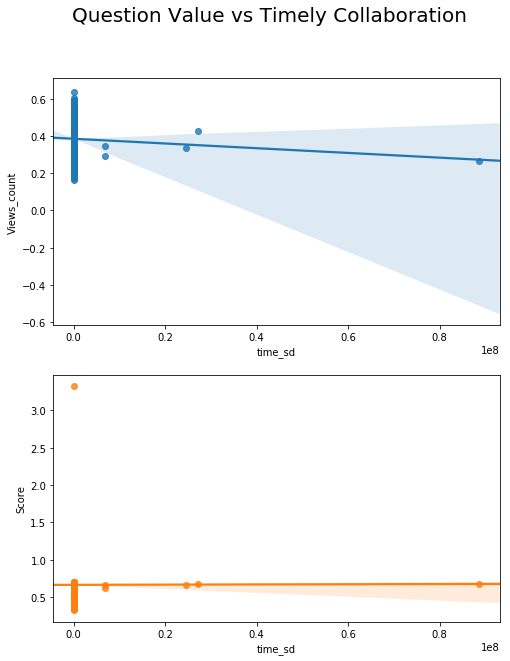

In [294]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, View_log, ax=ax1)
sns.regplot(df_comb.time_sd, Scores_log, ax=ax2)

# Probability of a question being answered as a function of time in minutes
eg. $P(\text{question is answered}|t=0,...,n , n=1,...,1440)$ for 

## Parents Post Data Wrangling

In [295]:
#Parents_post
df_answers

,Id,PostTypeId,ParentID,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount
0,235,2,231.0,NaN,2008-08-01T22:18:21,4,NaN,<p>Here is the official Microsoft Solution to ...,91.0,-1.0,NaN,2013-06-14T14:22:37.283,2013-06-14T14:22:37.283,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1334,2,1329.0,NaN,2008-08-04T15:23:08,15,NaN,"<p>You can try <a href=""http://www.codesector....",267.0,NaN,NaN,NaN,2008-08-04T15:23:08.620,NaN,NaN,NaN,NaN,NaN,1,NaN
2,1661,2,1644.0,NaN,2008-08-04T22:36:18,19,NaN,"<p>The <a href=""http://google-code-updates.blo...",116.0,NaN,NaN,NaN,2008-08-04T22:36:18.327,2008-09-19T23:57:26.630,NaN,NaN,NaN,NaN,0,NaN
3,2066,2,2046.0,NaN,2008-08-05T10:19:08,1,NaN,"<p>I would also mock the database, and check t...",259.0,NaN,NaN,NaN,2008-08-05T10:19:08.563,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2487,2,2483.0,NaN,2008-08-05T15:44:46,82,NaN,<p>The former will throw an exception if the s...,266.0,266.0,NaN,2009-10-09T05:33:21.060,2009-10-09T05:33:21.060,NaN,NaN,NaN,NaN,NaN,0,NaN
5,2727,2,2688.0,NaN,2008-08-05T19:21:49,0,NaN,"<p>In PHP, I'm using this one and I'll appreci...",435.0,NaN,NaN,NaN,2008-08-05T19:21:49.090,NaN,NaN,NaN,NaN,NaN,0,NaN
6,2947,2,104.0,NaN,2008-08-05T22:47:49,9,NaN,<blockquote>\r\n <p>I guess in a managed envi...,357.0,NaN,NaN,NaN,2008-08-05T22:47:49.440,NaN,NaN,NaN,NaN,NaN,0,NaN
7,3514,2,3486.0,NaN,2008-08-06T15:00:15,0,NaN,<p>I'm guessing you're trying to prevent scree...,419.0,NaN,NaN,NaN,2008-08-06T15:00:15.780,NaN,NaN,NaN,NaN,NaN,0,NaN
8,3855,2,3831.0,NaN,2008-08-06T18:55:57,7,NaN,<p>Try the following</p>\r\n\r\n<pre><code>If ...,26.0,1012641.0,NaN,2013-05-18T04:49:53.537,2013-05-18T04:49:53.537,NaN,NaN,NaN,NaN,NaN,0,NaN
9,4188,2,4149.0,NaN,2008-08-07T00:31:47,1,NaN,"<p>Not Java per-se, but you may run into issue...",188.0,NaN,NaN,NaN,2008-08-07T00:31:47.203,NaN,NaN,NaN,NaN,NaN,0,NaN


In [296]:
df_answers_time.head()

,Cr_time,ParentID
0,1217629101,231.0
1,1217863388,1329.0
2,1217889378,1644.0
3,1217931548,2046.0
4,1217951086,2483.0


In [297]:
parents_time = Parents_post.CreationDate.str[:-4]

In [298]:
unix_parents = [date_ts(i) for i in parents_time]

In [299]:
df_parents_time = pd.DataFrame({'Cr_time_parents':unix_parents, 'ParentID':Parents_post.Id})

In [300]:
df_parents_time.head()

,Cr_time_parents,ParentID
0,1217764233,657
1,1217820842,1005
2,1218011653,3164
3,1218171087,5682
4,1218337659,7015


## Merge Table & Create Columns of mins and hours

In [301]:
df_compare = pd.merge(df_parents_time, df_answers_time, on='ParentID')

In [302]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time
0,1218589547,9376,1280500505
1,1221247018,59787,1369123758
2,1221833205,102083,1332440822
3,1222078308,114112,1222112925
4,1222390548,137182,1458319693


In [303]:
df_compare['Duration'] = df_compare.Cr_time - df_compare.Cr_time_parents

In [304]:
df_compare['Duration_mins'] = df_compare.Duration/60

In [305]:
df_compare['Duration_hours'] = df_compare.Duration_mins/60

In [306]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time,Duration,Duration_mins,Duration_hours
0,1218589547,9376,1280500505,61910958,1.031849e+06,17197.488333
1,1221247018,59787,1369123758,147876740,2.464612e+06,41076.872222
2,1221833205,102083,1332440822,110607617,1.843460e+06,30724.338056
3,1222078308,114112,1222112925,34617,5.769500e+02,9.615833
4,1222390548,137182,1458319693,235929145,3.932152e+06,65535.873611


In [307]:
df_compare.Duration_mins.describe()

count    1.049000e+03
mean     1.409823e+05
std      4.568105e+05
min      6.116667e+00
25%      2.220000e+01
50%      1.058500e+02
75%      3.211433e+03
max      3.932152e+06
Name: Duration_mins, dtype: float64

In [308]:
df_compare.Duration_hours.describe()

count     1049.000000
mean      2349.705063
std       7613.507734
min          0.101944
25%          0.370000
50%          1.764167
75%         53.523889
max      65535.873611
Name: Duration_hours, dtype: float64

In [309]:
neg = 0
pos = 0
for i in df_compare.Duration_hours:
    if i >= 0:
        pos += 1
    else:
        neg += 1
print(pos, neg)

#15 negative duration, possibly an error from collecting data
#ie. negative duration means answer being posted before the parents questions being posted (not possible)

1049 0


In [310]:
df_compare.head()

,Cr_time_parents,ParentID,Cr_time,Duration,Duration_mins,Duration_hours
0,1218589547,9376,1280500505,61910958,1.031849e+06,17197.488333
1,1221247018,59787,1369123758,147876740,2.464612e+06,41076.872222
2,1221833205,102083,1332440822,110607617,1.843460e+06,30724.338056
3,1222078308,114112,1222112925,34617,5.769500e+02,9.615833
4,1222390548,137182,1458319693,235929145,3.932152e+06,65535.873611


## Calculate Frequency and Probability of mins and hours

In [311]:
Duration_mins_rounded = df_compare.Duration_mins.round()

In [312]:
fre_mins = pd.DataFrame(Duration_mins_rounded.value_counts(), index=None)
fre_mins['mins'] = fre_mins.index
fre_mins = fre_mins.rename(columns={'Duration_mins':'Frequency','mins':'mins'})
fre_mins.reset_index(inplace=True, drop=True)
#drop negative mins
fre_mins.drop(fre_mins[fre_mins.mins < 0].index, inplace=True)
fre_mins = fre_mins.sort_values('mins')

In [313]:
fre_mins.head()

,Frequency,mins
50,3,6.0
3,21,7.0
1,25,8.0
0,34,9.0
4,19,10.0


In [314]:
fre_mins['Probabiity'] = fre_mins.Frequency/sum(fre_mins.Frequency)

In [315]:
fre_mins.head()

,Frequency,mins,Probabiity
50,3,6.0,0.002860
3,21,7.0,0.020019
1,25,8.0,0.023832
0,34,9.0,0.032412
4,19,10.0,0.018112


In [316]:
fre_mins.Probabiity.describe()

count    585.000000
mean       0.001709
std        0.002790
min        0.000953
25%        0.000953
50%        0.000953
75%        0.000953
max        0.032412
Name: Probabiity, dtype: float64

## Plot (Probability)

Text(0.5,1,'Probability of Answered in terms of Minutes')

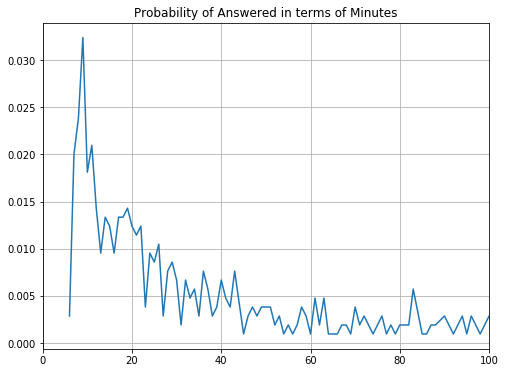

In [317]:
fig=plt.figure(figsize=(8,6))
plt.plot(fre_mins.mins, fre_mins.Probabiity)
plt.xlim(0,100)
plt.grid()
plt.title('Probability of Answered in terms of Minutes')

## Cumulative Probability 

In [318]:
fre_mins.head()

,Frequency,mins,Probabiity
50,3,6.0,0.002860
3,21,7.0,0.020019
1,25,8.0,0.023832
0,34,9.0,0.032412
4,19,10.0,0.018112


In [319]:
fre_mins['cum_pro'] = np.cumsum(list(fre_mins.Probabiity))

In [320]:
fre_mins.head()

,Frequency,mins,Probabiity,cum_pro
50,3,6.0,0.002860,0.002860
3,21,7.0,0.020019,0.022879
1,25,8.0,0.023832,0.046711
0,34,9.0,0.032412,0.079123
4,19,10.0,0.018112,0.097235


Text(0.5,0,'cumulative probability')

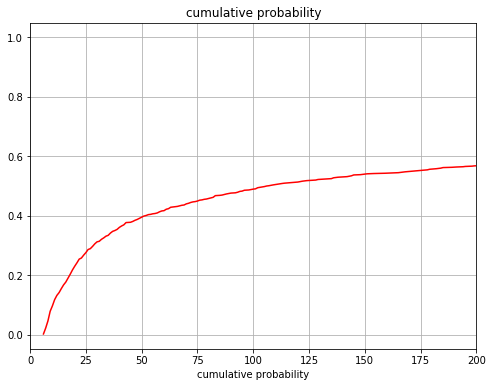

In [321]:
fig=plt.figure(figsize=(8,6))
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='red')
plt.xlim(0,200)
plt.grid()
plt.title('cumulative probability')
plt.xlabel('cumulative probability')

## Summary of Probability Plots

Text(0.5,1,'cumulative probability')

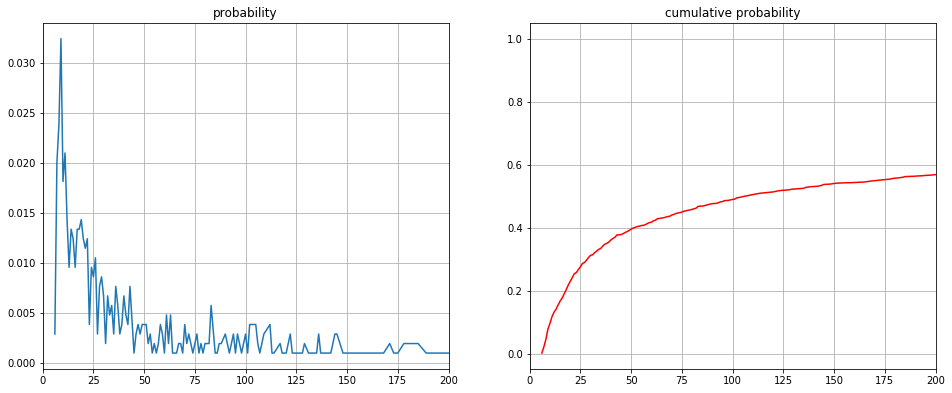

In [322]:
fig=plt.figure(figsize=(16,14))
plt.subplot(221)
plt.plot(fre_mins.mins, fre_mins.Probabiity)
plt.xlim(0,200)
plt.grid()
plt.title('probability')
plt.subplot(222)
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='red')
plt.xlim(0,200)
plt.grid()
plt.title('cumulative probability')

# Similarity

## Load Data

In [323]:
x = ['esmond desmond donia connie','esmond desmond donia connie']
#y = ['my name is duncan and i am a girl from jupyter']
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer().fit_transform(x)

In [324]:
(tf_idf * tf_idf.T).A

array([[ 1.,  1.],
       [ 1.,  1.]])

In [325]:
import json
with open('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/300000_rows_[504_MB]/graph_dump_load.txt', 'r') as json_file:
    data = json.load(json_file)

In [326]:
data_df = pd.DataFrame.from_dict(data, orient='columns', dtype=None)

In [327]:
data_df = pd.DataFrame.transpose(data_df)

In [328]:
data_df['User.Id'] = data_df.index

In [329]:
data_df.reset_index(inplace=True, drop=True)

In [330]:
data_df.head()

,answers,asks,comments,User.Id
0,"[755369, 177539]",NaN,NaN,1
1,[39879668],[12221770],NaN,1000011
2,NaN,NaN,[385844],10000221
3,NaN,NaN,[820956],10000247
4,[11984163],NaN,NaN,1000030


## Extract Content - Answers

In [331]:
user_ans = pd.DataFrame({'answers':data_df.answers, 'User.Id':data_df['User.Id']})

In [332]:
user_ans = user_ans.dropna()
user_ans = user_ans.reset_index(drop=True)

In [333]:
user_ans.head()

,User.Id,answers
0,1,"[755369, 177539]"
1,1000011,[39879668]
2,1000030,[11984163]
3,1000045,[10055767]
4,1000095,[32768158]


In [334]:
i = 755369
Posts[Posts.Id == i].Body

4168    <p>catastrophic backtracking!</p>\r\n\r\n<bloc...
Name: Body, dtype: object

In [335]:
user_ans.answers[0]

[755369, 177539]

In [338]:
user_ans

,User.Id,answers
0,1,"[755369, 177539]"
1,1000011,[39879668]
2,1000030,[11984163]
3,1000045,[10055767]
4,1000095,[32768158]
5,1000103,[12044894]
6,1000145,[15058645]
7,100017,[10715396]
8,100020,[1514905]
9,1000222,"[48158437, 45445325]"
